# Diabetes Case Study 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas_profiling as pp
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [14]:
df = pd.read_csv('diabetes-2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Negitive patients represented by 0 and Positive patients represented by 1: 
 Outcome
Negitive    1
Positive    1
dtype: int64


<AxesSubplot:title={'center':'Diabetes Outcome'}, xlabel='Outcome', ylabel='Total'>

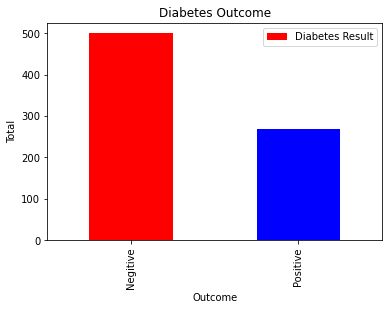

In [13]:
### Diabetes Outcome 

count_outcome = df.value_counts("Outcome")
print("Negitive patients represented by 0 and Positive patients represented by 1:", "\n", count_outcome)

df = pd.DataFrame({"Outcome": ["Negitive", "Positive"], "Diabetes Result": [500, 268]})

df.plot.bar(x = "Outcome", y = "Diabetes Result", color = ("Red","Blue"), ylabel = 'Total', title = 'Diabetes Outcome')

# Data Cleaning and Pre-processing

In [15]:
###Lets check the dataset for missing values, identify the size of the dataset and preform some general cleaning steps before progressing
print('\n', df.isnull().values.any())
print('\n', df.dtypes)

print('\n', df.describe())


 False

 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000

In [17]:
### Identify columns missing data
### here I exclude columns Pregnancies, and Outcome as 0 is a valid score for these parameters and 
###I don't want to remove them from the dataset

Glucose_Missing_values = (df["Glucose"] == 0).sum()
print("The number of patients missing Glucose data is:", "\n", Glucose_Missing_values)

BloodPressure_Missing_values = (df["BloodPressure"] == 0).sum()
print("The number of patients missing Blood Pressure data is:", "\n", BloodPressure_Missing_values)

SkinThickness_Missing_values = (df["SkinThickness"] == 0).sum()
print("The number of patients missing Skin Thickness data is:", "\n", SkinThickness_Missing_values)

Insulin_Missing_values = (df["Insulin"] == 0).sum()
print("The number of patients missing Insulin data is:", "\n", Insulin_Missing_values)

BMI_Missing_values = (df["BMI"] == 0).sum()
print("The number of patients missing BMI data is:", "\n", BMI_Missing_values)

DiabetesPedigreeFunction_Missing_values = (df["DiabetesPedigreeFunction"] == 0).sum()
print("The number of patients missing Diabetes Pedigree Function data is:", "\n", DiabetesPedigreeFunction_Missing_values)

Age_Missing_values = (df["Age"] == 0).sum()
print("The number of patients missing Age data is:", "\n", Age_Missing_values)


### Next replace missing values with NAN values 

Glucose_column = df["Glucose"]
Glucose_column.replace(to_replace = 0, value = np.nan, inplace=True)

BloodPressure_column = df["BloodPressure"]
BloodPressure_column.replace(to_replace = 0, value = np.nan, inplace=True)

SkinThickness_column = df["SkinThickness"]
SkinThickness_column.replace(to_replace = 0, value = np.nan, inplace=True)

Insulin_column = df["Insulin"]
Insulin_column.replace(to_replace = 0, value = np.nan, inplace=True)

BMI_column = df["BMI"]
BMI_column.replace(to_replace = 0, value = np.nan, inplace=True)

DiabetesPedigreeFunction_column = df["DiabetesPedigreeFunction"]
DiabetesPedigreeFunction_column.replace(to_replace = 0, value = np.nan, inplace=True)

Age_column = df["Age"]
Age_column.replace(to_replace = 0, value = np.nan, inplace=True)


The number of patients missing Glucose data is: 
 5
The number of patients missing Blood Pressure data is: 
 35
The number of patients missing Skin Thickness data is: 
 227
The number of patients missing Insulin data is: 
 374
The number of patients missing BMI data is: 
 11
The number of patients missing Diabetes Pedigree Function data is: 
 0
The number of patients missing Age data is: 
 0


In [18]:
### remove outliers

Q_25 = 0.25
Q_75 = 0.75
res = df.quantile([Q_25, Q_75])

outlier_removal = (res.loc[Q_25] <= df) & (df <= res.loc[Q_75])   ### setting this to df returned a boolean table so intermediate variable outlier_removal was necessary
df[outlier_removal]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,NaN,33.6,NaN,NaN,1
1,1.0,NaN,66.0,29.0,NaN,NaN,0.351,31.0,0
2,NaN,NaN,64.0,NaN,NaN,NaN,NaN,32.0,1
3,1.0,NaN,66.0,23.0,94.0,28.1,NaN,NaN,0
4,NaN,137.0,NaN,35.0,168.0,NaN,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,NaN,101.0,76.0,NaN,180.0,32.9,NaN,NaN,0
764,2.0,122.0,70.0,27.0,NaN,NaN,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,NaN,0.245,30.0,0
766,1.0,126.0,NaN,NaN,NaN,30.1,0.349,NaN,1


In [19]:
### replace NAN values with mean for columns
Glucose_column = df["Glucose"]
Glucose_column.replace(to_replace = np.nan, value = Glucose_column.mean(), inplace=True)

BloodPressure_column = df["BloodPressure"]
BloodPressure_column.replace(to_replace = np.nan, value = BloodPressure_column.mean(), inplace=True)

SkinThickness_column = df["SkinThickness"]
SkinThickness_column.replace(to_replace = np.nan, value = SkinThickness_column.mean(), inplace=True)

Insulin_column = df["Insulin"]
Insulin_column.replace(to_replace = np.nan, value = Insulin_column.mean(), inplace=True)

BMI_column = df["BMI"]
BMI_column.replace(to_replace = np.nan, value = BMI_column.mean(), inplace=True)

Age_column = df["Age"]
Age_column.replace(to_replace = np.nan, value = Age_column.mean(), inplace=True)

DiabetesPedigreeFunction_column = df["DiabetesPedigreeFunction"]
DiabetesPedigreeFunction_column.replace(to_replace = np.nan, value = DiabetesPedigreeFunction_column.mean(), inplace=True)

df.head()


### Data Cleaning and Pre-processing is now complete for the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


# Check for Correlation

In [20]:
### Correlation heatmap from seaborn
corr = df.corr()
corr
heatmap = corr.style.background_gradient(cmap ='coolwarm')
heatmap

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


Highest correlation between feature and Diabetes Outcome of 1 is Glucose with a correlation score of 0.493
Lowest correlation between feature and Diabetes Outcome of 1 is BloodPressure with a corr score of 0.166

# Evaluation of ML Models for Diabetes Prediction


In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [22]:
### Split dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
# Normalise the data for ease of processing 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Application of Machine Learning models

# Logistic Regression 

In [24]:
logistic_regression = LogisticRegression(random_state = 0)
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [25]:
### making prediction
Y_pred_logistic_regression = logistic_regression.predict(X_test)

In [26]:
### evaluating accuracy scores on test set
accuracy_logistic_regression = accuracy_score(y_test, Y_pred_logistic_regression)

In [27]:
### Confusion matrix and Evalaution Scores

print('Logistic Regression CM: ' , confusion_matrix(y_test, Y_pred_logistic_regression))
print('\n', classification_report(y_test, Y_pred_logistic_regression))

Logistic Regression CM:  [[97 10]
 [18 29]]

               precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



[Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression')]

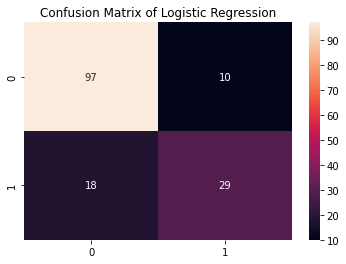

In [37]:
### visualisation of confusion matrix
cm_matrix_lr = confusion_matrix(y_test, Y_pred_logistic_regression)
sns.heatmap(cm_matrix_lr, annot=True).set(title = 'Confusion Matrix of Logistic Regression')

In [28]:
### ROC and AUC for model evaluation
y_pred_probability= logistic_regression.predict_proba(X_test)[::,1]

In [29]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_probability)

In [30]:
auc= metrics.roc_auc_score(y_test, y_pred_probability)

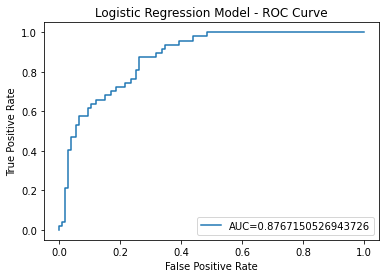

In [34]:
%matplotlib inline
plt.plot(false_positive_rate, true_positive_rate,label = "AUC=" + str(auc))
plt.title('Logistic Regression Model - ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

AUC score of 0.87 acheived which is a great result, with 1.0 being the maximum.

In [62]:
### Identifying which features have the greatest influence on the model prediction of Diabetes

### preparing the features 
X.columns

random_patient = X.sample(1, random_state = 50)

logistic_regression.predict(random_patient)

C:\Users\carlp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1], dtype=int64)

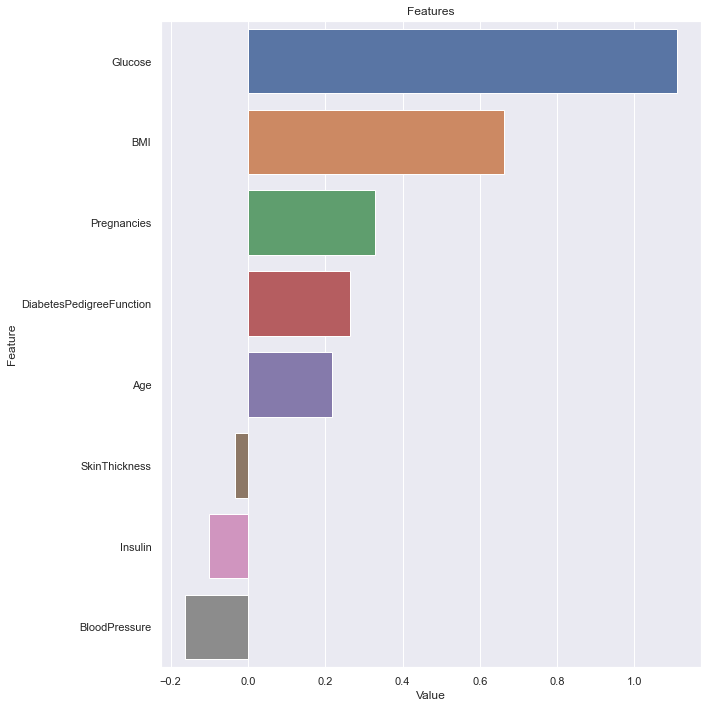

In [64]:
### Visualising the features contributing to the models prediction of Diabetes

Diabetes_features = pd.DataFrame({'Value': logistic_regression.coef_[8], 'Feature': X.columns})
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
sns.barplot(x="Value", y="Feature", data = Diabetes_features.sort_values(by = "Value", ascending=False)[0:8])
plt.title('Features')
plt.tight_layout()
plt.show()

Glucose measurement is clearly the most determinant feature for Diabetes in this dataset

# K Nearest Neighbor 

In [38]:
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

### lets select 10 as number of nearest neighbors as a default, this could be any number in reality and can be optimised later

KNeighborsClassifier(n_neighbors=10)

In [39]:
### making a prediction using the trained model
Y_pred_knn = knn.predict(X_test)

In [40]:
accuracy_knn = accuracy_score(y_test, Y_pred_knn)

In [41]:
print('KNN CM:',confusion_matrix(y_test, Y_pred_knn))
print(classification_report(y_test, Y_pred_knn))


KNN CM: [[96 11]
 [21 26]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



[Text(0.5, 1.0, 'Confusion Matrix of KNN')]

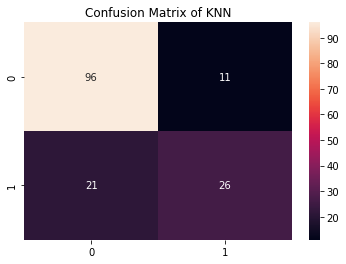

In [42]:
### visualisation of confusion matrix
cm_matrix_knn = confusion_matrix(y_test, Y_pred_knn)
sns.heatmap(cm_matrix_knn, annot=True).set(title = 'Confusion Matrix of KNN')

In [32]:
### ROC and AUC for model evaluation
y_pred_proba_knn= knn.predict_proba(X_test)[::,1]

In [33]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba_knn)

In [34]:
auc= metrics.roc_auc_score(y_test, y_pred_proba_knn)

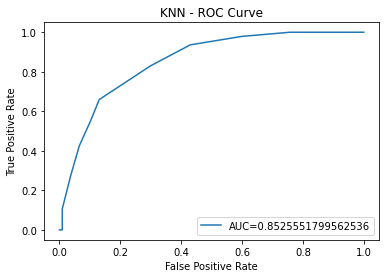

In [35]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('KNN - ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

#  SVC 

In [43]:
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [44]:
Y_pred_svc = svc.predict(X_test)

In [45]:
accuracy_svc = accuracy_score(y_test, Y_pred_svc)

In [46]:
print('SVC CM:',confusion_matrix(y_test, Y_pred_svc))
print(classification_report(y_test, Y_pred_svc))

SVC CM: [[97 10]
 [19 28]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



[Text(0.5, 1.0, 'Confusion Matrix of Support Vector Classification')]

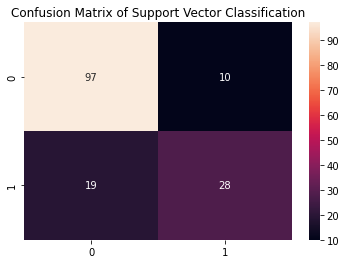

In [47]:
### visualisation of confusion matrix
cm_matrix_svc = confusion_matrix(y_test, Y_pred_svc)
sns.heatmap(cm_matrix_svc, annot=True).set(title = 'Confusion Matrix of Support Vector Classification')

ROC and AUC for model evaluation:
SVC does not easily conform to ROC evaluation. ROC curve requires probability estimates which one-class SVC doesn't try to produce

# Naive Bayes 

In [48]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [49]:
Y_pred_naive_bayes = naive_bayes.predict(X_test)

In [50]:
accuracy_naive_bayes = accuracy_score(y_test, Y_pred_naive_bayes)

In [51]:
### Confusion Matrix and Evaluation Scores
print('Naive Bayes CM:',confusion_matrix(y_test, Y_pred_naive_bayes))
print(classification_report(y_test, Y_pred_naive_bayes))


Naive Bayes CM: [[90 17]
 [16 31]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.65      0.66      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.79      0.79      0.79       154



[Text(0.5, 1.0, 'Confusion Matrix of Naive Bayes')]

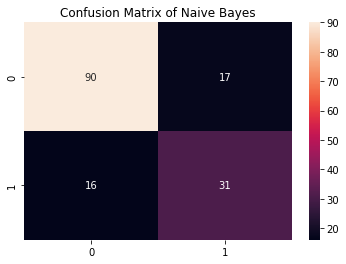

In [52]:
### visualisation of confusion matrix
cm_matrix_nb = confusion_matrix(y_test, Y_pred_naive_bayes)
sns.heatmap(cm_matrix_nb, annot=True).set(title = 'Confusion Matrix of Naive Bayes')

In [45]:
### ROC and AUC for model evaluation
y_pred_proba_naive_bayes= naive_bayes.predict_proba(X_test)[::,1]

In [46]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba_naive_bayes)

In [47]:
auc= metrics.roc_auc_score(y_test, y_pred_proba_naive_bayes)

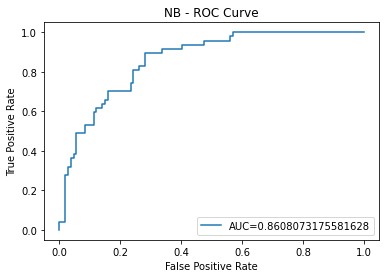

In [48]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('NB - ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

# Decision Tree 

In [53]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [54]:
Y_pred_decision_tree = decision_tree.predict(X_test)

In [55]:
accuracy_decision_tree = accuracy_score(y_test, Y_pred_decision_tree)

In [56]:
### Confusion Matrix and Evaluation Scores
print('Decision Tree CM:',confusion_matrix(y_test, Y_pred_decision_tree))
print(classification_report(y_test, Y_pred_decision_tree))


Decision Tree CM: [[79 28]
 [15 32]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       107
           1       0.53      0.68      0.60        47

    accuracy                           0.72       154
   macro avg       0.69      0.71      0.69       154
weighted avg       0.75      0.72      0.73       154



[Text(0.5, 1.0, 'Confusion Matrix of Decision Tree')]

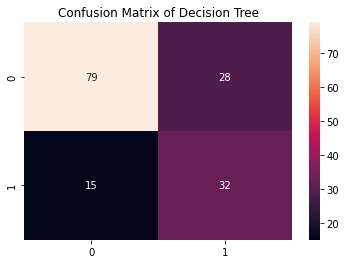

In [57]:
### visualisation of confusion matrix
cm_matrix_dt = confusion_matrix(y_test, Y_pred_decision_tree)
sns.heatmap(cm_matrix_dt, annot=True).set(title = 'Confusion Matrix of Decision Tree')

In [50]:
### ROC and AUC for model evaluation
y_pred_proba_DT= decision_tree.predict_proba(X_test)[::,1]

In [51]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba_DT)

In [52]:
auc= metrics.roc_auc_score(y_test, y_pred_proba_DT)

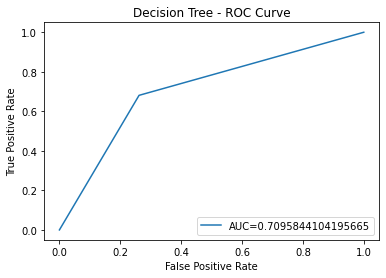

In [53]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('Decision Tree - ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

# Random Forest

In [58]:
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [59]:
### making prediction
y_pred_random_forest = random_forest.predict(X_test)

In [60]:
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

In [61]:
### Confusion Matrix and Evaluation Scores

print('Random Forest CM:',confusion_matrix(y_test, y_pred_random_forest))
print(classification_report(y_test, y_pred_random_forest))

Random Forest CM: [[93 14]
 [22 25]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       107
           1       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154



[Text(0.5, 1.0, 'Confusion Matrix of Random Forest')]

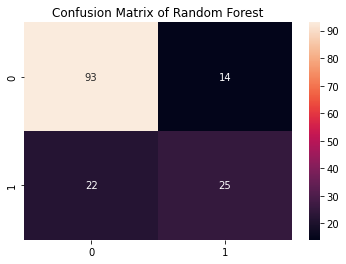

In [63]:
### visualisation of confusion matrix
cm_matrix_rf = confusion_matrix(y_test, y_pred_random_forest)
sns.heatmap(cm_matrix_rf, annot = True).set(title = 'Confusion Matrix of Random Forest')

In [56]:
### ROC and AUC for model evaluation
y_pred_proba_RF= random_forest.predict_proba(X_test)[::,1]

In [57]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba_RF)

In [58]:
auc= metrics.roc_auc_score(y_test, y_pred_proba_RF)

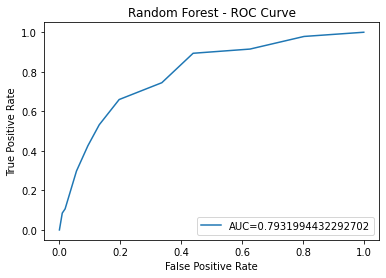

In [59]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('Random Forest - ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

In [42]:
### Summary of Accuracy Scores

print("Logistic Regression: " + str((accuracy_logistic_regression).round(3)))
print("K Nearest Neighbors: " + str((accuracy_knn).round(3)))
print("Support Vector Classifier: " + str((accuracy_svc).round(3)))
print("Naive Bayes: " + str((accuracy_naive_bayes).round(3)))
print("Decision Tree: " + str((accuracy_decision_tree).round(3)))
print("Random Forest: " + str((accuracy_random_forest).round(3)))


Logistic Regression: 0.818
K Nearest Neighbors: 0.792
Support Vector Classifier: 0.812
Naive Bayes: 0.786
Decision Tree: 0.721
Random Forest: 0.766


# Visualising Model Accuracy Scores

In [114]:
### Plotting training and test set accuracy scores

n_groups = 6            ### number of groups to be plotted in the bar graph
algorithms = ('Logistic Regression', 'K-Nearest Neighbour', 'SVC', 'Naive Bayes', 'Decision Tree', 'Random Forest')
train_accuracy_scores = (accuracy_score(y_train, logistic_regression.predict(X_train))*100,
                  accuracy_score(y_train, knn.predict(X_train))*100,
                  accuracy_score(y_train, svc.predict(X_train))*100,
                  accuracy_score(y_train, naive_bayes.predict(X_train))*100,
                  accuracy_score(y_train, decision_tree.predict(X_train))*100,
                  accuracy_score(y_train, random_forest.predict(X_train))*100)


test_accuracy_scores = (accuracy_logistic_regression * 100,
                        accuracy_knn * 100,
                        accuracy_svc * 100,
                        accuracy_naive_bayes * 100,
                        accuracy_decision_tree * 100,
                        accuracy_random_forest * 100)      ### *100 all accuracy scores to give them as percentage out of 100
                        

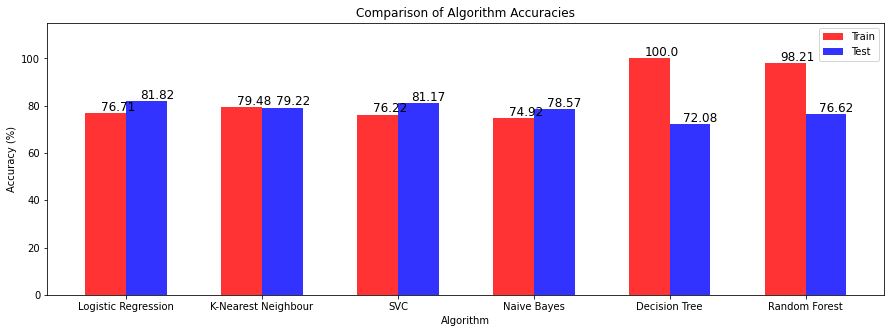

In [80]:
### Bar Plot of Train and test sets

### setting the parameters for the bar graph
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy_scores, bar_width, alpha = opacity, color='Red', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy_scores, bar_width, alpha = opacity, color='Blue', label='Test')



plt.xlabel('Algorithm') 
plt.ylabel('Accuracy (%)') 
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies')
plt.xticks(index + bar_width * 0.5, algorithms) 
plt.legend(loc = 'upper right')

### bar parameters settings
for index, data in enumerate(train_accuracy_scores):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 12))
for index, data in enumerate(test_accuracy_scores):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 12))

plt.show()

Based off the 6 most common regression models, Logistic Regression has given the highest accuracy score of 81.81.

Next lets try and optimise if possible each model to see if this increases the evaluation scores

# Logistic Regression Optimisation

Logistic Regression has no obvious parameters available for optimisation. Changing the random state is not considered parameter
optimisation as in this case random state merely shuffles the data and does not govern the models behaviour

# KNN Optimisation


C:\Users\carlp\AppData\Local\Temp\ipykernel_10640\2348486486.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  acc = pd.Series()
C:\Users\carlp\AppData\Local\Temp\ipykernel_10640\2348486486.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
C:\Users\carlp\AppData\Local\Temp\ipykernel_10640\2348486486.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
C:\Users\carlp\AppData\Local\Temp\ipykernel_10640\2348486486.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\carlp\AppData\Local\Temp\ipykernel_10640\2348486486.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
C:\Users\carlp\AppData\Local\Temp\ipykernel_10640\2348486486.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
C:\Users\carlp\AppData\Local\Temp\ipykernel_10640\2348486486.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
C:\Users\carlp\AppData\Local\Temp\ipykernel_10640\2348486486.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future versio

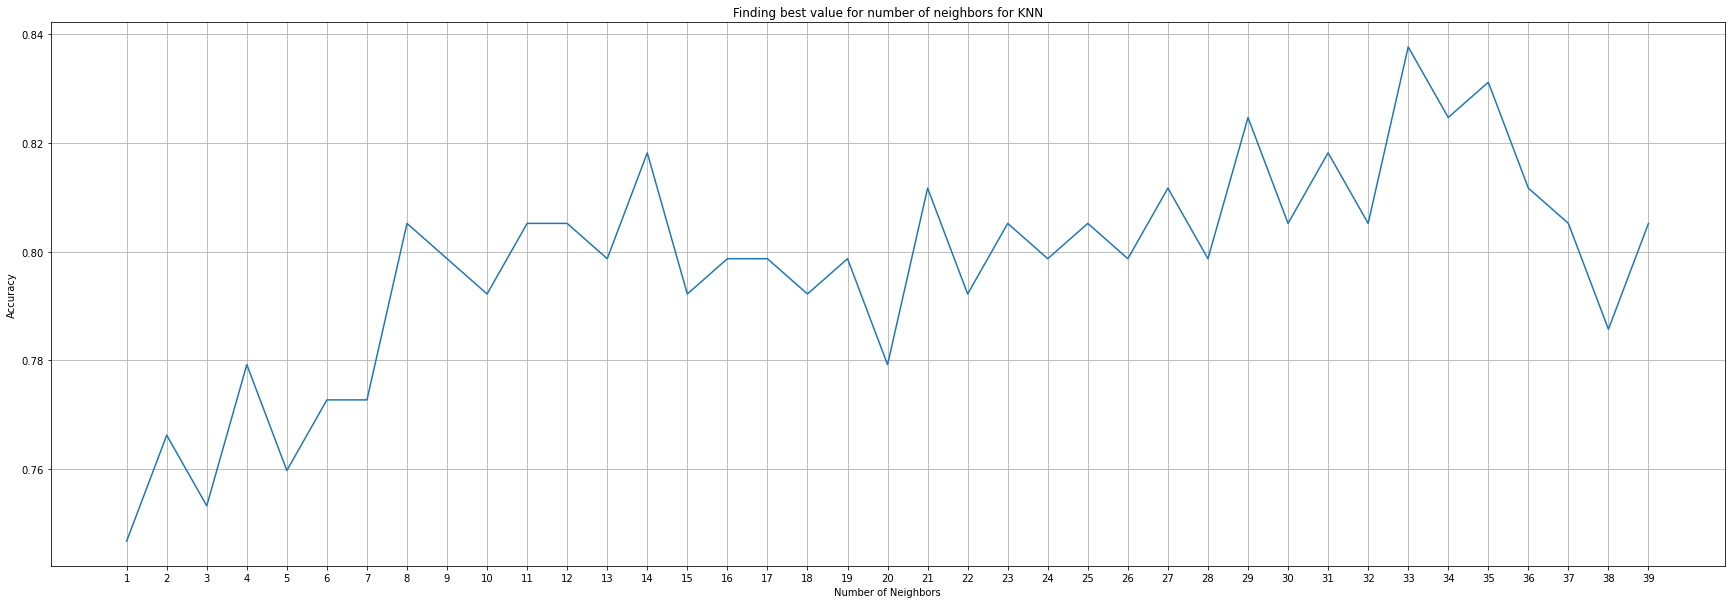

Highest value:  0.838


In [115]:
### Plotting a graph for finding the optimal number of nearest neighbors 


X_axis = list(range(1, 40))
acc = pd.Series()
x = range(1, 40)

### selecting the range then iterating the number of neighbors into the model
for i in list(range(1, 40)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))

### settings for the line plot
fig18, ax18 = plt.subplots(figsize=(30,10))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for number of neighbors for KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ', (acc.values.max().round(3)))

As seen in the graph, the optimum number of nearest neighbors is 33 producing an accuracy score of 0.838 which is
an improvement on the previous score of 0.792

In [65]:
### applying optimised number of neighbors
knn_2 = KNeighborsClassifier(n_neighbors = 33, metric = 'minkowski', p = 2)
knn_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=33)

In [66]:
### making a prediction using the trained model
Y_pred_knn_2 = knn_2.predict(X_test)

In [67]:
accuracy_knn_2 = accuracy_score(y_test, Y_pred_knn_2)

In [68]:
print('KNN CM:',confusion_matrix(y_test, Y_pred_knn_2))
print(classification_report(y_test, Y_pred_knn_2))

KNN CM: [[96 11]
 [14 33]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       107
           1       0.75      0.70      0.73        47

    accuracy                           0.84       154
   macro avg       0.81      0.80      0.81       154
weighted avg       0.84      0.84      0.84       154



[Text(0.5, 1.0, 'Confusion Matrix of KNN- Optimised')]

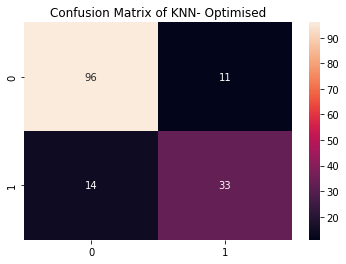

In [69]:
### visualisation of confusion matrix
cm_matrix_knn_2 = confusion_matrix(y_test, Y_pred_knn_2)
sns.heatmap(cm_matrix_knn_2, annot=True).set(title = 'Confusion Matrix of KNN- Optimised')

# Random Forest Optimisation

In [92]:
rf = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [93]:
### Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

### Number of features to consider at every split
max_features = ['auto', 'sqrt']      ### default is auto so I included sqrt to give alos as an option

### Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

### Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]      ### I expanded past the default number of 2

### Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5]        ### I expanded past the default number of 1

### Method of selecting samples for training each tree
bootstrap = [True, False]

### Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [94]:
### Using the random grid to search for best parameters

### The base model to tune the parameters
rf = RandomForestRegressor()

### Random search of parameters, using 3 fold cross validation, 
### Search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

### Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [95]:
### return the optimum parameters for the Random Forest model
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [96]:
rf_classifier = GradientBoostingClassifier()

In [97]:
### using optimal parameters from best_params
rf_classifier = GradientBoostingClassifier(n_estimators = 1600, min_samples_split = 2, min_samples_leaf = 5, 
                                        max_features = 'sqrt', max_depth = 10)


In [99]:
### Print accuracy score for 10 combinations of parameters 
RF_accuracy_2 = cross_val_score(rf_classifier, X_test, y_test.ravel(), cv=10)  
print((RF_accuracy_2.round(3)))

### Printing the mean of the 10 scores
print((RF_accuracy_2.mean().round(3)))

[0.938 0.875 0.75  0.562 0.667 0.8   0.733 0.867 0.667 0.8  ]
0.766


Minor improvement in accuracy score for Random Forest from 0.766 to 0.785 using optimised parameters

# SVC Optimisation

In [81]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']}
SVM_Model = SVC(gamma = 'auto')


In [82]:
### Using RandomisedSearchCV to identify best parameters
SVC_grid = RandomizedSearchCV(estimator = SVM_Model, param_distributions = param_grid, cv = 3, verbose = 2, n_jobs = 4)
                                                                 ### cv = cross validation number, 5 is default usually
                                                                                     

In [83]:
### fitting the model to the training set
SVC_grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(gamma='auto'), n_jobs=4,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear']},
                   verbose=2)

In [84]:
### extracting the best parameters
SVC_grid.best_params_

{'kernel': 'linear', 'gamma': 0.01, 'C': 10}

In [85]:
SVC_grid.best_estimator_

SVC(C=10, gamma=0.01, kernel='linear')

In [86]:
print(SVC_grid.score(X_train, y_train))

0.760586319218241


In [88]:
### print accuracy score of SVC with best parameters
SVC_accuracy_2 = SVC_grid.score(X_test, y_test)
print(SVC_accuracy_2)

0.8116883116883117


The optimised model produced an accuracy score of 0.812 (rounded to two decimel places), which is no improvement on the
default parameters for the model.

# Decision Tree Optimisation

In [106]:
### identifying the max depth for the decision tree
decision_tree.tree_.max_depth

20

In [112]:
### identifing the optimum max depth for the decision tree

for max_d in range(1,21):
    decision_tree_model = DecisionTreeClassifier(max_depth = max_d, random_state=42)
    decision_tree_model.fit(X_train, y_train)
    print('Training Set Accuracy for max_depth {} is:'.format(max_d), decision_tree_model.score(X_train, y_train))
    print('Test Set Accuracy for max_depth {} is:'.format(max_d), decision_tree_model.score(X_test, y_test))
    print(' ')

Training Set Accuracy for max_depth 1 is: 0.7214983713355049
Test Set Accuracy for max_depth 1 is: 0.7207792207792207
 
Training Set Accuracy for max_depth 2 is: 0.7638436482084691
Test Set Accuracy for max_depth 2 is: 0.7662337662337663
 
Training Set Accuracy for max_depth 3 is: 0.7638436482084691
Test Set Accuracy for max_depth 3 is: 0.7662337662337663
 
Training Set Accuracy for max_depth 4 is: 0.7899022801302932
Test Set Accuracy for max_depth 4 is: 0.7727272727272727
 
Training Set Accuracy for max_depth 5 is: 0.8257328990228013
Test Set Accuracy for max_depth 5 is: 0.6948051948051948
 
Training Set Accuracy for max_depth 6 is: 0.8550488599348535
Test Set Accuracy for max_depth 6 is: 0.7402597402597403
 
Training Set Accuracy for max_depth 7 is: 0.8973941368078175
Test Set Accuracy for max_depth 7 is: 0.7467532467532467
 
Training Set Accuracy for max_depth 8 is: 0.9234527687296417
Test Set Accuracy for max_depth 8 is: 0.7337662337662337
 
Training Set Accuracy for max_depth 9 is

In [70]:
decision_tree_2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth = 4)
decision_tree_2.fit(X_train, y_train)

Y_pred_decision_tree_2 = decision_tree_2.predict(X_test)

accuracy_decision_tree_2 = accuracy_score(y_test, Y_pred_decision_tree_2)

### Confusion Matrix and Evaluation Scores
print('Decision Tree CM:',confusion_matrix(y_test, Y_pred_decision_tree_2))
print(classification_report(y_test, Y_pred_decision_tree_2))
accuracy_decision_tree_2 = accuracy_score(y_test, Y_pred_decision_tree_2)

Decision Tree CM: [[92 15]
 [22 25]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       107
           1       0.62      0.53      0.57        47

    accuracy                           0.76       154
   macro avg       0.72      0.70      0.70       154
weighted avg       0.75      0.76      0.75       154



[Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Optimised')]

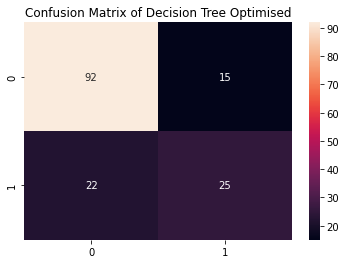

In [71]:
### visualisation of confusion matrix
cm_matrix_dt_2 = confusion_matrix(y_test, Y_pred_decision_tree_2)
sns.heatmap(cm_matrix_dt_2, annot=True).set(title = 'Confusion Matrix of Decision Tree Optimised')

The optimum number for max_depth is 4, with the highest test set accuracy score of 0.772. This is a good improvement on the default setting accuracy score of 0.721.

# Naive Bayes Optimisation 

In [74]:
param_grid_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [75]:
### GridSearchCV for exploring optimal parameters

NBModel_grid = GridSearchCV(estimator = GaussianNB(), param_grid = param_grid_NB, verbose=1, cv=10, n_jobs=-1)
NBModel_grid.fit(X_train, y_train)
print(NBModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.43287612810830584)


In [76]:
### predicting using the test set
y_pred_NB = NBModel_grid.predict(X_test)


In [90]:
### Confusion matrix
print(confusion_matrix(y_test, y_pred_NB), ": confusion matrix")

### Accuracy score
NB_accuracy_2 = accuracy_score(y_test, y_pred_NB)
print(NB_accuracy_2)

[[93 14]
 [18 29]] : confusion matrix
0.7922077922077922


[Text(0.5, 1.0, 'Confusion Matrix of Naive Bayes Optimised')]

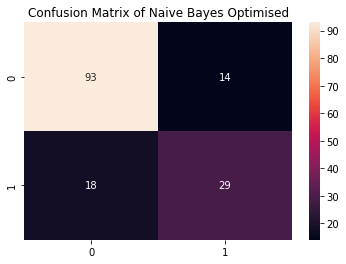

In [79]:
### visualisation of confusion matrix
cm_matrix_nb_2 = confusion_matrix(y_test, y_pred_NB)
sns.heatmap(cm_matrix_nb_2, annot=True).set(title = 'Confusion Matrix of Naive Bayes Optimised')

 Optimised model produced an accuracy score of 0.792 which is in improvement from 0.786

# Optimised model results

In [108]:
### summary of optimised model Accuracy scores
print('Summary of optimised model accuracy scores:')
print('KNN Optimised Accuracy score :', accuracy_knn_2.round(3))
print('Random Forest Optimised Accuracy score :', RF_accuracy_2.mean().round(3))
print('SVC Optimised Accuracy score :', SVC_accuracy_2.round(3))
print('Decision Tree Optimised Accuracy score :', accuracy_decision_tree_2.round(3))
print('Naive Bayes Optimised Accuracy score :', NB_accuracy_2.round(3))

Summary of optimised model accuracy scores:
KNN Optimised Accuracy score : 0.838
Random Forest Optimised Accuracy score : 0.766
SVC Optimised Accuracy score : 0.812
Decision Tree Optimised Accuracy score : 0.76
Naive Bayes Optimised Accuracy score : 0.792


Overall there is a small improvement in the models with optimised parameters with the greatest improvement being
Decision Tree.

# Case Study Conclusion

Having compared six of the most common supervised learning models for their ability to predict the diagnosis of 
Diabetes using this dataset the model I would select is K-Nearest Neighbor.
KNN produced the highest overall accuracy score of 0.838 and given the number of features in the dataset and the weak correlation between each feature and the Outcome this is a great result.